# **Telecommunication Customers Churn Prediction**
**By Muhammad Rizdky Maulady**

- **Programming Language**

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)

- **Git and Github**

Repository : [Telecommunication Customers Churn Prediction](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious.git)
- **Dataset**

[Telecommunication Customer](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign "Telecommunication Customer")

`1. Fitur mana yang sebaiknya digunakan dari hasil EDA?`

`2. Apakah ada feature tambahan lain yang mendukung?`

`3. Melakukan training model & prediksi churn sebagai variabel target.`

`4. Mengevaluasi model dengan metrics Recall dan ROC-AUC.`

Definisi masing-masing kolom

● Customerid: id dari customer

● Gender: gender dari customer

● Seniorcitizen: apakah merupakan senior citizen atau tidak

● Partner: apakah memiliki partner atau tidak

● Dependents: apakah memiliki tanggungan atau tidak seperti anak dll

● Tenure: tenure dari langganan customer

● PhoneService: apakah menggunakan layanan phone atau tidak

● MultipleLines: apakah menggunakan multiple lines atau tidak

● InternetService: Tipe dari internet service yang digunakan

● OnlineSecurity: apakah menggunakan fitur online security

● OnlineBackup: apakah menggunakan fitur online backup

● DeviceProtection: apakah menggunakan fitur device protection

● TechSupport: apakah menggunakan fitur tech support atau tidak

● StreamingTV: apakah menggunakan fitur streaming TV atau tidak

● StreamingMovies: apakah menggunakan fiture streaming film atau tidak

● Contract: tipe contract dari customer

● PaperlessBilling: apakah menggunakan fitur paperless billing atau tidak

● PaymentMethod: payment tipe yang digunakan oleh customer

● MonthlyCharges: total charges/biaya bulanan yang dibayarkan

● TotalCharges: total charges secara keseluruhan yang dibayarkan

● Churn: target variabel yang menunjukan bahwa customer churn atau tidak


# **📌 Ekstraksi Data**

In [98]:
# Import library yang dibutuhkan
import pandas as pd


# Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)

# Ekstraksi data
raw_data = pd.read_csv('Telecom_Customers_Churn.csv')

# Tampilkan sampel data
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


# **📌 Informasi Umum Data**

In [99]:
# Periksa informasi umum pada data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **📌Transformasi & Cleaning Data**

### **Melakukan Standarisasi Nama Kolom**

In [100]:
# Mengubah nama kolom menjadi lower case
raw_data.columns = raw_data.columns.str.lower()

# Tampilkan hasilnya
raw_data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


### **Konversi Tipe Data**

In [101]:
raw_data[raw_data['totalcharges'].str.contains('[^0-9\.]', regex=True)]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550000,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850000,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050000,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,,No


In [102]:
import numpy as np

# Proses mengganti spasi menjadi null
raw_data['totalcharges'] = raw_data['totalcharges'].replace('\s+', np.nan, regex=True)

# Proses mengubah tipe data menjadi float
raw_data['totalcharges'] = raw_data['totalcharges'].astype('float')

# Ubah seniorcitizen menjadi tipe object
raw_data['seniorcitizen'] = raw_data['seniorcitizen'].astype('object')


* Penanganan Nilai Tidak Valid: Dengan mengganti spasi dalam kolom totalcharges dengan nilai NaN, data yang tidak valid diidentifikasi dan ditandai. Ini penting untuk menjaga integritas data dan mencegah kesalahan dalam analisis.

* Konversi Tipe Data: Mengubah tipe data kolom totalcharges menjadi float memastikan bahwa nilai-nilai dalam kolom tersebut dapat diproses sebagai angka desimal. Ini memungkinkan analisis numerik yang akurat dan perhitungan statistik yang diperlukan.

* Pengelolaan Data Kategorikal: Mengubah tipe data kolom seniorcitizen menjadi object memberikan fleksibilitas dalam menyimpan dan menganalisis nilai kategorikal. Ini penting untuk analisis yang melibatkan klasifikasi atau pengelompokan berdasarkan status kewarganegaraan senior.

In [103]:
# Menampilkan baris yang memiliki null pada totalcharges
raw_data[raw_data['totalcharges'].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550000,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850000,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050000,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No


In [104]:
# Periksa kembali
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


### **Handle Missing Values**

In [105]:
# Hitung mediannya
med_totalcharges = raw_data['totalcharges'].median()

# Melakukan imputasi (pengisian missing value)
raw_data['totalcharges'] = raw_data['totalcharges'].fillna(med_totalcharges)

# Re-Check info umum
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


### **Handle Duplicated Data**

In [106]:
raw_data.duplicated(subset = 'customerid').sum()

0

Tidak ada data yang duplikat.

# **📌Exploratory Data Analysis**

In [107]:
import plotly.express as px

# Membuat dataframe untuk distribusi churn
churn_counts = raw_data['churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Membuat plot menggunakan Plotly
fig = px.bar(churn_counts, x='Churn', y='Count',
             title='Distribusi Churn',
             labels={'Churn': 'Churn Status', 'Count': 'Jumlah Pelanggan'},
             color='Churn')

fig.show()

Dari grafik ini, dapat disimpulkan bahwa mayoritas pelanggan tidak mengalami churn, yang menunjukkan bahwa perusahaan atau layanan tersebut memiliki tingkat retensi pelanggan yang baik.
Sebaliknya, jumlah pelanggan yang mengalami churn relatif kecil, yang mungkin menunjukkan bahwa ada peluang untuk meningkatkan strategi retensi pelanggan lebih lanjut.

In [108]:
# Memilih kolom numerik
numeric_columns = raw_data.select_dtypes(include=['int64', 'float64'])

# Menampilkan statistik deskriptif untuk kolom numerik
numeric_columns.describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Di asumsikan bahwa nilai pada kolom tenure adalah jumlah bulan

## **Handling Outliers**

In [109]:
import plotly.express as px

df_numeric = raw_data.select_dtypes(include=['int64', 'float64'])  # Memilih kolom numerik

# Definisikan warna yang digunakan
color = ['#ff6d00', '#ff8500', '#ff9e00', '#240046', '#5a189a', '#9d4edd', '#18af9d']

# Loop untuk membuat box plot untuk setiap kolom numerik
for i in range(len(df_numeric.columns)):
    # Membuat box plot horizontal
    fig = px.box(
        df_numeric,
        x=df_numeric.columns[i],
        orientation='h',
        color_discrete_sequence=[color[i % len(color)]]
    )

    # Memperbarui layout dan menampilkan plot
    fig.update_layout(
        title=f'<b>Box Plot untuk {df_numeric.columns[i]}</b>',
        yaxis=dict(
            title='',
            showgrid=False,
            showline=False,
            showticklabels=False,
            zeroline=False,
        ),
        xaxis=dict(
            title='Total',
            showgrid=False,
            showline=True,
            showticklabels=True,
            zeroline=False,
        )
    )

    fig.show()

Dalam fitur numerik pada dataset ini tidak ada outlier

## **Hitung Data Kategorik**

In [110]:
object_col = raw_data.select_dtypes(include = 'object').columns

for col in object_col:
    print(f"\033[1;33m{col}\033[0m\n{raw_data[col].unique()}\n")

customerid
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

seniorcitizen
[0 1]

partner
['Yes' 'No']

dependents
['No' 'Yes']

phoneservice
['No' 'Yes']

multiplelines
['No phone service' 'No' 'Yes']

internetservice
['DSL' 'Fiber optic' 'No']

onlinesecurity
['No' 'Yes' 'No internet service']

onlinebackup
['Yes' 'No' 'No internet service']

deviceprotection
['No' 'Yes' 'No internet service']

techsupport
['No' 'Yes' 'No internet service']

streamingtv
['No' 'Yes' 'No internet service']

streamingmovies
['No' 'Yes' 'No internet service']

contract
['Month-to-month' 'One year' 'Two year']

paperlessbilling
['Yes' 'No']

paymentmethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

churn
['No' 'Yes']



In [111]:
raw_data = raw_data.replace('No internet service', 'No')
raw_data = raw_data.replace('No phone service', 'No')

for col in object_col:
    print(f"\033[1;33m{col}\033[0m\n{raw_data[col].unique()}\n")

customerid
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

seniorcitizen
[0 1]

partner
['Yes' 'No']

dependents
['No' 'Yes']

phoneservice
['No' 'Yes']

multiplelines
['No' 'Yes']

internetservice
['DSL' 'Fiber optic' 'No']

onlinesecurity
['No' 'Yes']

onlinebackup
['Yes' 'No']

deviceprotection
['No' 'Yes']

techsupport
['No' 'Yes']

streamingtv
['No' 'Yes']

streamingmovies
['No' 'Yes']

contract
['Month-to-month' 'One year' 'Two year']

paperlessbilling
['Yes' 'No']

paymentmethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

churn
['No' 'Yes']



* Nilai No internet service dan No phone service dalam DataFrame raw_data diganti dengan No untuk menyederhanakan kategori dan menghindari kebingungan dalam analisis.

In [112]:
for col in object_col:
    print(f"\033[1;33m{col}\033[0m\n")
    print(raw_data[col].value_counts(), '\n')

customerid

customerid
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64 

gender

gender
Male      3555
Female    3488
Name: count, dtype: int64 

seniorcitizen

seniorcitizen
0    5901
1    1142
Name: count, dtype: int64 

partner

partner
No     3641
Yes    3402
Name: count, dtype: int64 

dependents

dependents
No     4933
Yes    2110
Name: count, dtype: int64 

phoneservice

phoneservice
Yes    6361
No      682
Name: count, dtype: int64 

multiplelines

multiplelines
No     4072
Yes    2971
Name: count, dtype: int64 

internetservice

internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

onlinesecurity

onlinesecurity
No     5024
Yes    2019
Name: count, dtype: int64 

onlinebackup

onlinebackup
No     4614
Yes    2429
Name: count, dtype: int64 

deviceprotection

devi

Melihat jumlah distribusi per kolom / fitur

In [113]:
data_churn = raw_data[raw_data['churn'] == 'Yes'].reset_index(drop = True)

for col in object_col:
    print(f"\033[1;33m{col}\033[0m\n")
    print(data_churn[col].value_counts(), '\n')

customerid

customerid
3668-QPYBK    1
6633-MPWBS    1
6532-YLWSI    1
7067-KSAZT    1
0511-JTEOY    1
             ..
0235-KGSLC    1
1846-XWOQN    1
5103-MHMHY    1
4094-NSEDU    1
8361-LTMKD    1
Name: count, Length: 1869, dtype: int64 

gender

gender
Female    939
Male      930
Name: count, dtype: int64 

seniorcitizen

seniorcitizen
0    1393
1     476
Name: count, dtype: int64 

partner

partner
No     1200
Yes     669
Name: count, dtype: int64 

dependents

dependents
No     1543
Yes     326
Name: count, dtype: int64 

phoneservice

phoneservice
Yes    1699
No      170
Name: count, dtype: int64 

multiplelines

multiplelines
No     1019
Yes     850
Name: count, dtype: int64 

internetservice

internetservice
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64 

onlinesecurity

onlinesecurity
No     1574
Yes     295
Name: count, dtype: int64 

onlinebackup

onlinebackup
No     1346
Yes     523
Name: count, dtype: int64 

deviceprotection

device

# **📌 Feature Engineering**

## **✨Fitur Tambahan**

In [114]:
raw_data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.150000,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.650000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [115]:
# Menambahkan fitur baru tenure_range
def categorize_tenure(tenure):
    if tenure <= 12:
        return '0-12 bulan'
    elif tenure <= 24:
        return '13-24 bulan'
    elif tenure <= 36:
        return '25-36 bulan'
    elif tenure <= 48:
        return '37-48 bulan'
    else:
        return '49 bulan ke atas'

raw_data['tenure_range'] = raw_data['tenure'].apply(categorize_tenure)

*   Lama Berlangganan dalam Rentang (tenure_range)

fitur pada tenure ke dalam rentang waktu (misalnya, 0-12 bulan, 13-24 bulan, dsb.), dengan alasan untuk membantu model memahami risiko churn berdasarkan periode langganan pelanggan. Pelanggan baru atau yang baru saja berganti kontrak mungkin memiliki risiko churn yang lebih tinggi.


In [116]:
# Menambahkan fitur baru tenure_monthly_charge_interaction
raw_data['tenure_monthly_charge_interaction'] = raw_data['tenure'] * raw_data['monthlycharges']

* Interaksi antara monthlycharges dan tenure (tenure_monthly_charge_interaction)


Fitur ini dapat menunjukkan bagaimana biaya bulanan berinteraksi dengan lama berlangganan untuk mempengaruhi churn, dengan alasan dapat menambahkan hubungakn yang komleks melalui fitur interaksi untuk meningkatkan kemampuan prediksi model.

In [117]:
# Menampilkan hasil penambahan fitur
raw_data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_range,tenure_monthly_charge_interaction
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,0-12 bulan,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889.500000,No,25-36 bulan,1936.300000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.150000,Yes,0-12 bulan,107.700000
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.750000,No,37-48 bulan,1903.500000
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.650000,Yes,0-12 bulan,141.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No,13-24 bulan,2035.200000
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No,49 bulan ke atas,7430.400000
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No,0-12 bulan,325.600000
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes,0-12 bulan,297.600000


# **📌Data Pre-processing**

## **Encoding**

In [118]:
data = raw_data.copy()

data = data.drop(columns = ['customerid'])

In [119]:
data['partner'] = data['partner'].map({'Yes': 0, 'No': 1})
data['internetservice'] = data['internetservice'].map({'Fiber optic': 2, 'DSL': 1, 'No' : 0})

In [120]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

object_col = data.select_dtypes(include = 'object').columns

for col in object_col:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_range,tenure_monthly_charge_interaction
0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,2,29.850000,29.850000,0,0,29.850000
1,1,0,1,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.950000,1889.500000,0,2,1936.300000
2,1,0,1,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.850000,108.150000,1,0,107.700000
3,1,0,1,0,45,0,0,1,1,0,1,1,0,0,1,0,0,42.300000,1840.750000,0,3,1903.500000
4,0,0,1,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.700000,151.650000,1,0,141.400000


LabelEncoder mengubah nilai-nilai kategorikal (misalnya, "Yes", "No", nama-nama layanan internet) menjadi angka (misalnya, 0, 1, 2).  Ini memungkinkan algoritma untuk memproses dan menggunakan informasi dari kolom-kolom kategorikal tersebut dalam proses pelatihan model.

## **Korelasi**

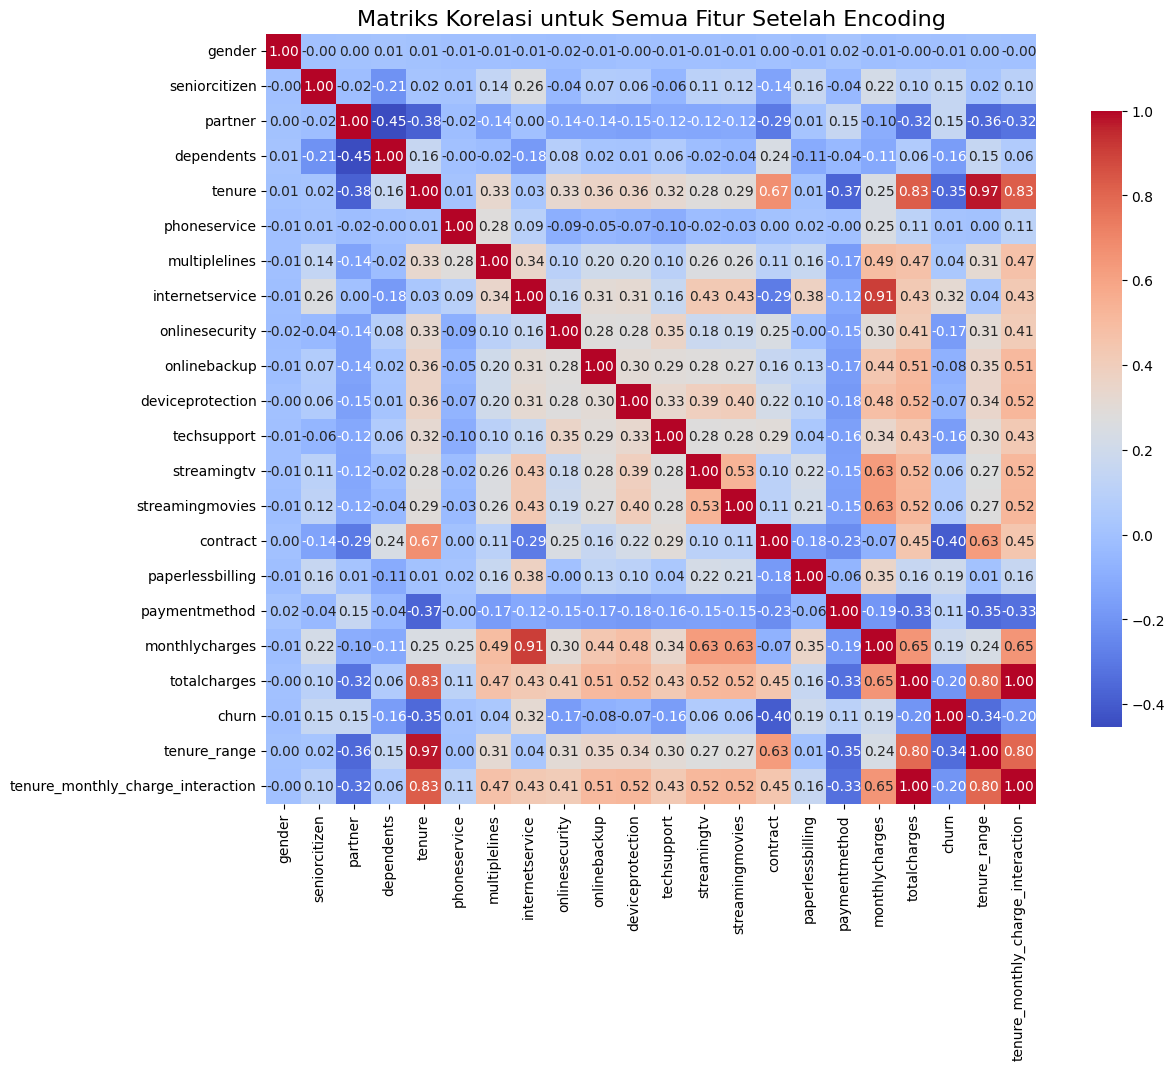

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

#Menghitung matriks korelasi
correlation_matrix = data.corr()

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi untuk Semua Fitur Setelah Encoding', fontsize=16)
plt.show()

In [122]:
corr = data.corrwith(data["churn"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")


corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr

,index,corr value,Corr Type
0,churn,1.000000,Positif
1,contract,0.396713,Negatif
2,tenure,0.352229,Negatif
3,tenure_range,0.339441,Negatif
4,internetservice,0.316846,Positif
5,totalcharges,0.199037,Negatif
6,tenure_monthly_charge_interaction,0.198514,Negatif
7,monthlycharges,0.193356,Positif
8,paperlessbilling,0.191825,Positif
9,onlinesecurity,0.171226,Negatif


In [123]:
# Filter features with correlation above a certain threshol
threshold = 0.15
significant_features = corr[corr['corr value'] > threshold]

significant_features

,index,corr value,Corr Type
0,churn,1.000000,Positif
1,contract,0.396713,Negatif
2,tenure,0.352229,Negatif
3,tenure_range,0.339441,Negatif
4,internetservice,0.316846,Positif
5,totalcharges,0.199037,Negatif
6,tenure_monthly_charge_interaction,0.198514,Negatif
7,monthlycharges,0.193356,Positif
8,paperlessbilling,0.191825,Positif
9,onlinesecurity,0.171226,Negatif


In [124]:
# Fitur-fitur yang korelasinya tidak signifikan dengan churn (di bawah threshold 0.15)
insignificant_features = corr[corr['corr value'] <= threshold]
insignificant_features

,index,corr value,Corr Type
14,paymentmethod,0.107062,Positif
15,onlinebackup,0.082255,Negatif
16,deviceprotection,0.066160,Negatif
17,streamingtv,0.063228,Positif
18,streamingmovies,0.061382,Positif
19,multiplelines,0.040102,Positif
20,phoneservice,0.011942,Positif
21,gender,0.008612,Negatif


##**✨ Fitur yang digunakan**

Berdasarkan heatmap korelasi di atas, ada beberapa fitur yang korelasi nya signifikan dengan target fitur churn (sesuai dengan nilai treshold yang ditetapkan sebesar 0.15).

Fitur-fitur ini sebagai berikut :

* contract
* tenure_range
* internetservice
* totalcharges
* tenure_monthly_charge_interaction
* monthlycharges
* paperlessbilling
* onlinesecurity
* techsupport
* dependents

Fitur yang Bisa Dipertimbangkan
* seniorcitizen & partner - meskipun korelasi positif kecil, karena pelanggan senior dan memiliki pasangan/partner sedikit lebih berisiko churn.
* streamingtv dan streamingmovies - meskipun korelasi sangat kecil dipertimbangkan karna dampak layanan hiburan terhadap churn.

fitur yang tidak digunakan
* paymentmethod
* onlinebackup
* deviceprotection
* multiplelines
* phoneservice
* gender
* tenure (karena sudah digantikan oleh tenure_range menghindari multikolinearitas)

## **Scalling Data**

In [125]:
from sklearn.preprocessing import RobustScaler

# Misalkan data sudah diproses sebelumnya
data = data.copy()

# Inisialisasi objek RobustScaler
scaler = RobustScaler()

# Fit dan transform data pada dataframe
scaled_values = scaler.fit_transform(data)

# Membuat dataframe baru dengan data yang telah discaling
df_scaled = pd.DataFrame(scaled_values, columns=data.columns)

# Tampilkan data yang telah discaling
df_scaled.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_range,tenure_monthly_charge_interaction
0,-1.000000,0.000000,-1.000000,0.000000,-0.608696,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.745170,-0.404100,0.000000,-0.500000,-0.402037
1,0.000000,0.000000,0.000000,0.000000,0.108696,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,-0.246550,0.145381,0.000000,0.000000,0.159989
2,0.000000,0.000000,0.000000,0.000000,-0.586957,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.303588,-0.380964,1.000000,-0.500000,-0.379087
3,0.000000,0.000000,0.000000,0.000000,0.347826,-1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,-2.000000,-0.516099,0.130977,0.000000,0.250000,0.150320
4,-1.000000,0.000000,0.000000,0.000000,-0.586957,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006440,-0.368111,1.000000,-0.500000,-0.369152


`RobustScaler` lebih tahan terhadap outlier dibandingkan `StandardScaler` atau `MinMaxScaler`.  Meskipun dalam eksplorasi data awal tidak ditemukan outlier yang jelas pada fitur numerik, penggunaan RobustScaler memberikan proteksi tambahan terhadap potensi `outlier yang mungkin tersembunyi atau muncul setelah proses encoding data kategorikal`.  Dengan demikian, RobustScaler membantu menjaga stabilitas dan akurasi model machine learning yang akan digunakan selanjutnya.


## **Data Split**

In [126]:
# Import library untuk splitting data
from sklearn.model_selection import train_test_split

# Definisikan fitur dan target
X = df_scaled.drop(columns=['churn','paymentmethod', 'onlinebackup', 'deviceprotection', 'multiplelines', 'gender', 'phoneservice', 'tenure'])
y = df_scaled['churn']

# Proses splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% data untuk pengujian
    random_state=42  # Untuk reprodusibilitas
)

# Periksa banyak data masing-masing
print(f'Banyak data latih = {X_train.shape[0]}')
print(f'Banyak data test  = {X_test.shape[0]}')

Banyak data latih = 5634
Banyak data test  = 1409


In [127]:
X.columns

Index(['seniorcitizen', 'partner', 'dependents', 'internetservice',
       'onlinesecurity', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'tenure_range', 'tenure_monthly_charge_interaction'],
      dtype='object')

In [128]:
X.shape

(7043, 14)

In [129]:
X_train.shape

(5634, 14)

## **Handling Imbalanced Dataset**

<ipython-input-130-60cd0d317dbf>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




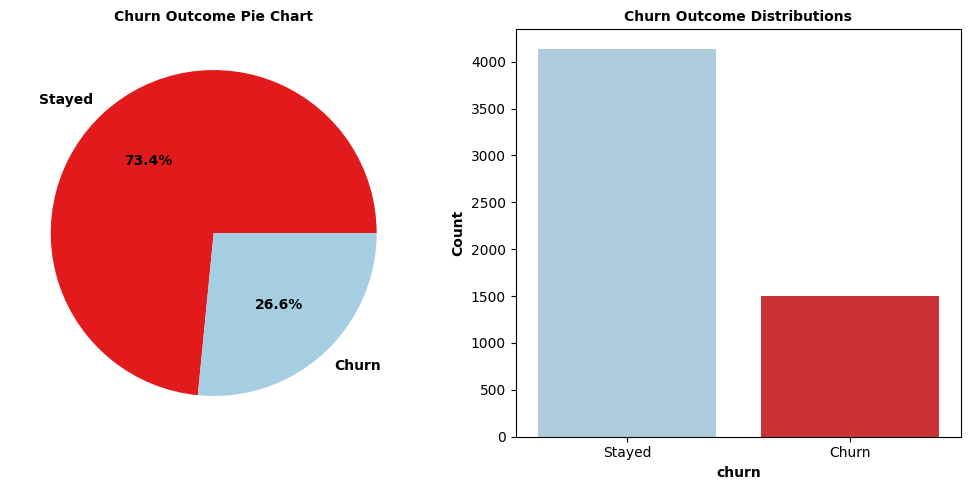

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['Stayed', 'Churn'],
        autopct = '%.1f%%',
        radius = 1,
        colors=["#e31a1c", "#a6cee3"],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Churn Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = y_train.apply(lambda x: "Stayed" if x == 0 else "Churn")
t = sns.countplot(x=resp, palette=["#a6cee3", "#e31a1c"])
t.set_xlabel('churn', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Churn Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

In [131]:
y_train.value_counts()

,count
churn,
0.000000,4138
1.000000,1496


In [132]:
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [133]:
y_train.value_counts()

,count
churn,
0.000000,4138
1.000000,4138


In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):

    # Prediksi pada data uji
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)


    # Menampilkan metrik evaluasi
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("ROC AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))


    try:
        # Menggunakan cross-validation untuk recall
        score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
        print('Recall (Crossval Train): %.2f' % score['train_score'].mean())
        print('Recall (Crossval Test): %.2f' % score['test_score'].mean())
    except Exception as e:
        print(f"Skipped cross-validation due to error: {e}")


# **📌Fitting Model** (Decision Tree)

`Decision Tree` adalah alat pemodelan yang berguna dalam analisis churn, memberikan interpretasi yang jelas dan membantu dalam pengambilan keputusan. Namun, penting untuk mengatasi potensi overfitting dan mempertimbangkan penggunaan ensemble methods seperti Random Forest untuk meningkatkan akurasi dan stabilitas model.

In [135]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(max_leaf_nodes = 5)

# Melatih model dengan data latih
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

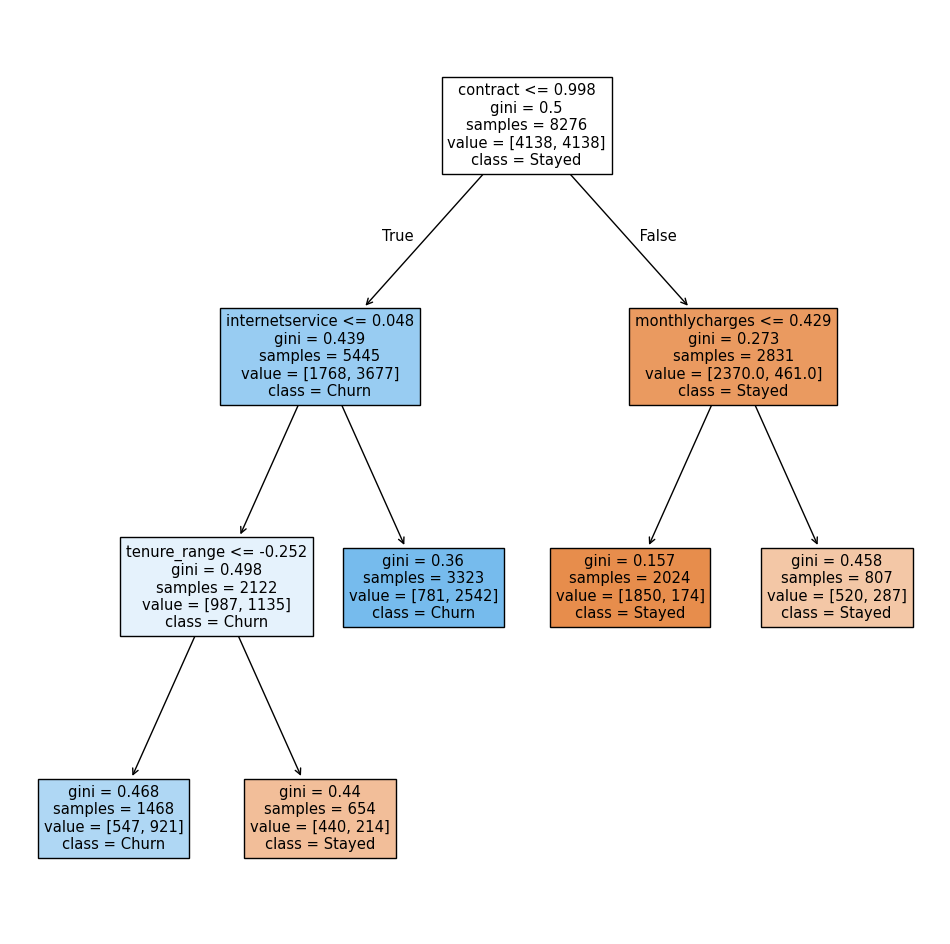

In [136]:
from sklearn import tree
import matplotlib.pyplot as plt

# Membuat plot pohon keputusan
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(
    dt_model,
    feature_names = dt_model.feature_names_in_,
    class_names = ['Stayed', 'Churn'],
    filled=True
)

plt.show()

### **Evaluation**

In [137]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi dengan data uji
y_pred = dt_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 72.39%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.78      1036
         1.0       0.49      0.86      0.62       373

    accuracy                           0.72      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.81      0.72      0.74      1409



In [138]:
eval_classification(dt_model)

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.72
Precision (Test Set): 0.49
Recall (Test Set): 0.86
F1-Score (Test Set): 0.62
ROC AUC (Train Set): 0.80
ROC AUC (Test Set): 0.81
Recall (Crossval Train): 0.38
Recall (Crossval Test): 0.37


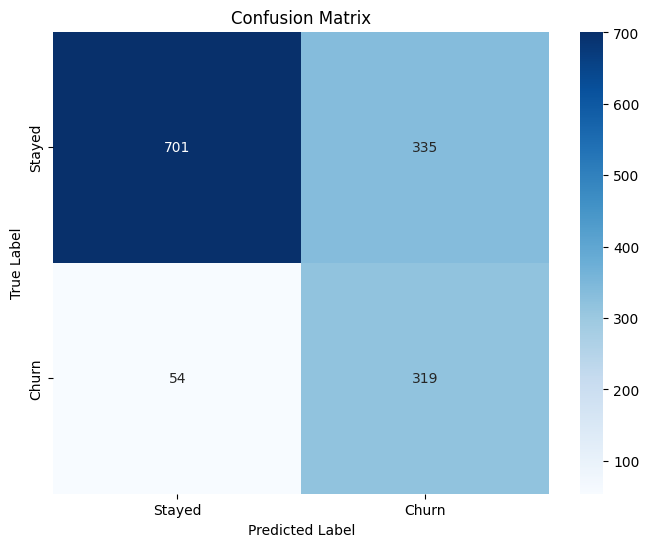

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churn'], yticklabels=['Stayed', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

* True Positives (TP): 319 (Pelanggan yang benar-benar churn dan diprediksi churn)
* True Negatives (TN): 701 (Pelanggan yang benar-benar stayed dan diprediksi stayed)
* False Positives (FP): 335 (Pelanggan yang benar-benar stayed tetapi diprediksi churn)
* False Negatives (FN): 54 (Pelanggan yang benar-benar churn tetapi diprediksi stayed)

* Kinerja Model: Model menunjukkan akurasi yang baik pada data train (76%) tetapi mengalami penurunan pada data test (72%), yang mengindikasikan potensi overfitting.
* Sensitivitas: Model memiliki recall yang tinggi (86%), yang berarti mampu mendeteksi sebagian besar pelanggan yang churn, tetapi precision yang rendah (49%) menunjukkan banyak prediksi churn yang salah.

* Keseimbangan: F1-Score (62%) menunjukkan bahwa meskipun model baik dalam mendeteksi churn, ada ruang untuk perbaikan dalam mengurangi kesalahan prediksi.

* ROC AUC: Nilai yang baik (0.80 untuk train dan 0.81 untuk test) menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara pelanggan yang churn dan yang tidak.

### **HyperParameter Tunning**

In [140]:
from sklearn.model_selection import GridSearchCV

# Menentukan grid hyperparameter untuk pencarian
param_grid = {
    'max_depth': [None, 5, 10, 20, 50],  # Kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 5],    # Minimum sampel pada daun
    'criterion': ['gini', 'entropy'] # Kriteria pemisahan
}

# Menggunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melatih model dengan pencarian hyperparameter
grid_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menggunakan model dengan hyperparameter terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi hasil
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy * 100:.2f}%")

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

eval_classification(best_model)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of the best model: 72.39%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.78      1036
         1.0       0.49      0.86      0.62       373

    accuracy                           0.72      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.81      0.72      0.74      1409

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.72
Precision (Test Set): 0.49
Recall (Test Set): 0.86
F1-Score (Test Set): 0.62
ROC AUC (Train Set): 0.80
ROC AUC (Test Set): 0.81
Recall (Crossval Train): 0.38
Recall (Crossval Test): 0.37


* Akurasi model terbaik adalah 72.39%, yang menunjukkan performa yang baik tetapi masih ada ruang untuk perbaikan.
* Stabilitas Model: Metrik utama seperti akurasi, precision, recall, dan F1-Score menunjukkan stabilitas setelah penyesuaian hyperparameter, dengan sedikit peningkatan dalam akurasi.
* Kinerja yang Baik: Model menunjukkan kemampuan yang baik dalam mendeteksi churn dengan recall yang tinggi, tetapi precision yang rendah menunjukkan bahwa banyak prediksi churn yang salah.

###**Feature Importance**

In [143]:
# Import library untuk visualisasi
import plotly.express as px

# Retrieve feature importances
feature_names = dt_model.feature_names_in_
importances = dt_model.feature_importances_

# Create a DataFrame with feature names and importances
df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
df = df.sort_values('Importance', ascending=True)

# Create a bar plot using Plotly Express
fig = px.bar(df, y='Feature', x='Importance', title='Feature Importances', orientation = 'h')

fig.update_layout(
    width = 1200,
    height = 600,
    showlegend = False,
    margin = dict(l=160, r=200, t=100, b=30),
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    title = dict(
        text = "<b>Feature Importance</b>",
        font = dict(
            size = 23,
            color = '#757882'
        ),
        y = 0.92
    ),
    yaxis = dict(
        title = '',
        showgrid = True,
        showline = True,
        zeroline = False,
        gridcolor='lightgray',
    ),
    xaxis = dict(
        showgrid = True,
        showline = True,
    ),
)

fig.show()

## **Kesimpulan**
1. Contract:
Fitur ini memiliki tingkat kepentingan tertinggi, menunjukkan bahwa jenis kontrak yang dimiliki pelanggan sangat berpengaruh terhadap keputusan mereka untuk churn. Pelanggan dengan kontrak jangka panjang mungkin lebih cenderung untuk tetap menggunakan layanan.
2. Internet Service:
Fitur ini juga menunjukkan kepentingan yang signifikan. Jenis layanan internet yang digunakan pelanggan dapat mempengaruhi kepuasan dan keputusan mereka untuk bertahan atau meninggalkan layanan.
3. Monthly Charges:
Tingkat kepentingan yang cukup tinggi menunjukkan bahwa biaya bulanan yang dibayarkan pelanggan berperan dalam keputusan churn. Pelanggan mungkin lebih cenderung untuk churn jika mereka merasa biaya tidak sebanding dengan layanan yang diterima.
4. Tenure Range:
Fitur ini menunjukkan bahwa lama pelanggan menggunakan layanan juga berpengaruh. Pelanggan yang baru mungkin lebih rentan untuk churn dibandingkan dengan pelanggan yang telah lama berlangganan.

* Pertimbangan Model Lain: Mengingat hasil yang diperoleh, saya akan mencoba menggunakan model lain untuk melihat performa yang lebih baik terutama dalam hal nilai precision dan F1-Score. Selanjutnya saya akan menggunakan model XGboost

# **📌 Fitting Model** (XGBoost)

`XGBoost` adalah pemodelan yang sangat efektif untuk analisis churn, memberikan akurasi tinggi dan kemampuan untuk menangani data yang kompleks. Dengan menggunakan XGBoost, perusahaan dapat lebih baik memahami pola churn dan merumuskan strategi retensi yang lebih baik, sehingga meningkatkan kepuasan pelanggan dan mengurangi kehilangan pendapatan.

In [145]:
# Importing libraries
import xgboost as xgb

# Membuat model XGBoost
xgb_clf = xgb.XGBClassifier()
# Melatih model dengan data latih
xgb_clf.fit(X_train, y_train)

# Memprediksi hasil model
y_pred = xgb_clf.predict(X_test)

### **Evaluation**

In [150]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi dengan data uji
y_pred = xgb_clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
eval_classification(xgb_clf)

Accuracy: 76.86%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1036
         1.0       0.55      0.65      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.77
Precision (Test Set): 0.55
Recall (Test Set): 0.65
F1-Score (Test Set): 0.60
ROC AUC (Train Set): 0.98
ROC AUC (Test Set): 0.84
Skipped cross-validation due to error: 'super' object has no attribute '__sklearn_tags__'


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



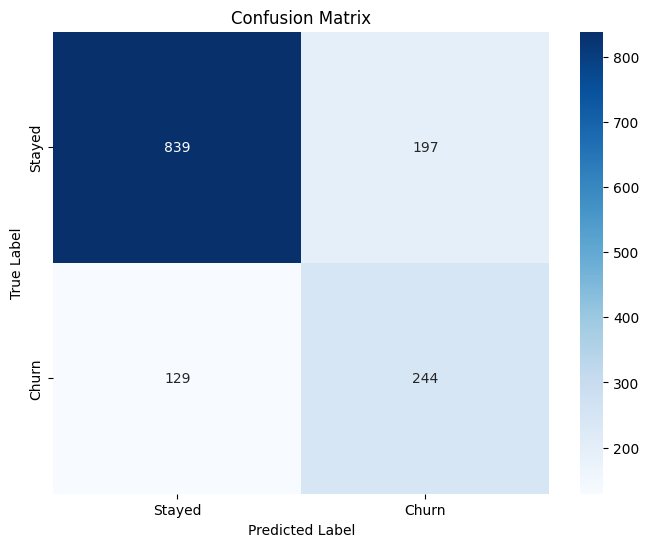

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churn'], yticklabels=['Stayed', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

* True Positives (TP): 244 (Pelanggan yang benar-benar churn dan diprediksi churn)
* True Negatives (TN): 839 (Pelanggan yang benar-benar stayed dan diprediksi stayed)
* False Positives (FP): 197 (Pelanggan yang benar-benar stayed tetapi diprediksi churn)
* False Negatives (FN): 129 (Pelanggan yang benar-benar churn tetapi diprediksi stayed)


* Kinerja Model: Model menunjukkan akurasi yang baik secara keseluruhan, tetapi ada ketidakseimbangan dalam kemampuan model untuk mendeteksi churn. Precision yang rendah untuk kelas churn menunjukkan bahwa banyak prediksi churn yang salah.
* Overfitting: Tingginya akurasi pada data train (92%) dibandingkan dengan data test (77%) menunjukkan potensi overfitting, yang perlu diatasi untuk meningkatkan generalisasi model.

### **HyperParameter Tunning**

Akurasi Model: 78.14%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      1036
         1.0       0.57      0.72      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.78
Precision (Test Set): 0.57
Recall (Test Set): 0.72
F1-Score (Test Set): 0.64
ROC AUC (Train Set): 0.94
ROC AUC (Test Set): 0.85
Skipped cross-validation due to error: 'super' object has no attribute '__sklearn_tags__'


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



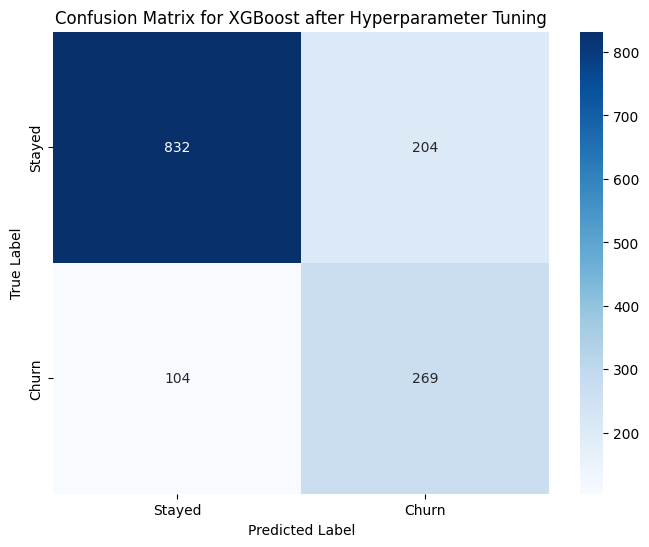

In [167]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Pilih kombinasi hyperparameter terbaik secara langsung
params = {
    'n_estimators': 100,  # Pilihan dari param_grid['n_estimators']
    'max_depth': 5,       # Pilihan dari param_grid['max_depth']
    'learning_rate': 0.1, # Pilihan dari param_grid['learning_rate']
    'subsample': 0.8,     # Pilihan dari param_grid['subsample']
    'colsample_bytree': 1.0, # Pilihan dari param_grid['colsample_bytree']
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

# Melatih model dengan hyperparameter yang dipilih
xgb_clf = xgb.XGBClassifier(**params)
xgb_clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Evaluasi model
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
eval_classification(xgb_clf)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Churn'], yticklabels=['Stayed', 'Churn'])
plt.title("Confusion Matrix for XGBoost after Hyperparameter Tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


* Peningkatan Kinerja: Secara keseluruhan, model menunjukkan peningkatan yang signifikan setelah penyesuaian hyperparameter, terutama dalam akurasi, precision, dan F1-Score.
* Keseimbangan: Meskipun recall untuk churn sedikit menurun, model menunjukkan peningkatan dalam kemampuan untuk memprediksi pelanggan yang tidak churn dengan lebih akurat.

###**Feature Importance**

In [155]:
# Import library untuk visualisasi
import plotly.express as px

# Retrieve feature importances
feature_names = xgb_clf.feature_names_in_
importances = xgb_clf.feature_importances_

# Create a DataFrame with feature names and importances
df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
df = df.sort_values('Importance', ascending=True)

# Create a bar plot using Plotly Express
fig = px.bar(df, y='Feature', x='Importance', title='Feature Importances', orientation = 'h')

fig.update_layout(
    width = 1200,
    height = 600,
    showlegend = False,
    margin = dict(l=160, r=200, t=100, b=30),
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    title = dict(
        text = "<b>Feature Importance</b>",
        font = dict(
            size = 23,
            color = '#757882'
        ),
        y = 0.92
    ),
    yaxis = dict(
        title = '',
        showgrid = True,
        showline = True,
        zeroline = False,
        gridcolor='lightgray',
    ),
    xaxis = dict(
        showgrid = True,
        showline = True,
    ),
)

fig.show()

## **Kesimpulan**
1. `Contract`: Fitur ini memiliki tingkat kepentingan tertinggi, menunjukkan bahwa jenis kontrak yang dimiliki pelanggan sangat berpengaruh terhadap keputusan mereka untuk churn.
2. `Internet Service`:
Fitur ini juga menunjukkan kepentingan yang signifikan. Jenis layanan internet yang digunakan pelanggan dapat mempengaruhi kepuasan dan keputusan mereka untuk tetap atau meninggalkan layanan.
3. `Tenure Range`:
Lama pelanggan menggunakan layanan juga berpengaruh. Pelanggan yang baru mungkin lebih rentan untuk churn dibandingkan dengan pelanggan yang telah lama berlangganan.
4. `Online Security`:
Adanya layanan keamanan online dapat mempengaruhi keputusan pelanggan untuk tetap menggunakan layanan.
5. `Paperless Billing`:
Penggunaan penagihan tanpa kertas juga berkontribusi terhadap keputusan pelanggan.
6. `Streaming TV` dan `Streaming Movies`:
Kedua fitur ini menunjukkan bahwa layanan streaming dapat mempengaruhi kepuasan pelanggan dan keputusan mereka untuk churn.
7. `Tech Support`:
Ketersediaan dukungan teknis juga berperan dalam keputusan pelanggan untuk tetap menggunakan layanan.
8. `Dependents dan Senior Citizen`:
Status keluarga dan usia pelanggan dapat mempengaruhi keputusan churn, meskipun dengan tingkat kepentingan yang lebih rendah.
9. `Monthly Charges` dan `Total Charges`:
Biaya bulanan dan total biaya yang dibayarkan selama berlangganan juga berkontribusi terhadap keputusan churn, tetapi tidak sekuat fitur utama.
10. `Tenure Monthly Charge Interaction`:
Interaksi antara lama berlangganan dan biaya bulanan menunjukkan bahwa hubungan antara kedua faktor ini dapat mempengaruhi keputusan churn.
11. `Partner`:
Fitur ini memiliki tingkat kepentingan terendah, menunjukkan bahwa status kemitraan pelanggan tidak terlalu berpengaruh terhadap keputusan churn.

Kinerja Model:
* Meskipun XGBoost menunjukkan kinerja yang baik, selalu ada kemungkinan untuk meningkatkan akurasi dan kemampuan generalisasi dengan mencoba model lain, saya akan membuat model `Random Forest` dan karena Random Forest ini cenderung lebih robust terhadap noise dalam data.

# **📌 Fitting Model (Random Forest)**

In [210]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **Evaluation**

In [211]:
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.77
Precision (Test Set): 0.56
Recall (Test Set): 0.58
F1-Score (Test Set): 0.57
ROC AUC (Train Set): 1.00
ROC AUC (Test Set): 0.82
Recall (Crossval Train): 0.99
Recall (Crossval Test): 0.49


* Overfitting: Model Random Forest menunjukkan tanda-tanda overfitting, dengan akurasi dan ROC AUC yang sangat tinggi pada data pelatihan tetapi penurunan kinerja pada data pengujian. Ini menunjukkan bahwa model mungkin terlalu kompleks untuk data yang ada.

* Kinerja pada Data Pengujian: Meskipun akurasi pada data pengujian adalah 77%, precision dan recall yang rendah menunjukkan bahwa model tidak cukup baik dalam mendeteksi pelanggan yang churn.


### **HyperParameter Tunning**

In [212]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

# Definisikan rentang hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.89
Accuracy (Test Set): 0.78
Precision (Test Set): 0.57
Recall (Test Set): 0.73
F1-Score (Test Set): 0.64
ROC AUC (Train Set): 0.96
ROC AUC (Test Set): 0.85
Recall (Crossval Train): 0.54
Recall (Crossval Test): 0.48


* Peningkatan Kinerja: Setelah tuning hyperparameter, model menunjukkan peningkatan yang signifikan dalam recall dan F1-Score, yang menunjukkan bahwa model lebih baik dalam mendeteksi pelanggan yang berisiko churn.
* Stabilitas Akurasi: Meskipun akurasi pada data pengujian tetap stabil, peningkatan dalam recall dan F1-Score menunjukkan bahwa model lebih efektif dalam mengidentifikasi churn.

Parameter value: 2, Train AUC: 0.993, Test AUC: 0.839
Parameter value: 5, Train AUC: 0.958, Test AUC: 0.849
Parameter value: 8, Train AUC: 0.937, Test AUC: 0.851
Parameter value: 12, Train AUC: 0.920, Test AUC: 0.856
Parameter value: 15, Train AUC: 0.909, Test AUC: 0.858
Parameter value: 19, Train AUC: 0.901, Test AUC: 0.858
Parameter value: 22, Train AUC: 0.897, Test AUC: 0.860
Parameter value: 26, Train AUC: 0.891, Test AUC: 0.860
Parameter value: 29, Train AUC: 0.889, Test AUC: 0.860
Parameter value: 32, Train AUC: 0.886, Test AUC: 0.862
Parameter value: 36, Train AUC: 0.883, Test AUC: 0.862
Parameter value: 39, Train AUC: 0.881, Test AUC: 0.862
Parameter value: 43, Train AUC: 0.878, Test AUC: 0.861
Parameter value: 46, Train AUC: 0.878, Test AUC: 0.862
Parameter value: 50, Train AUC: 0.875, Test AUC: 0.862


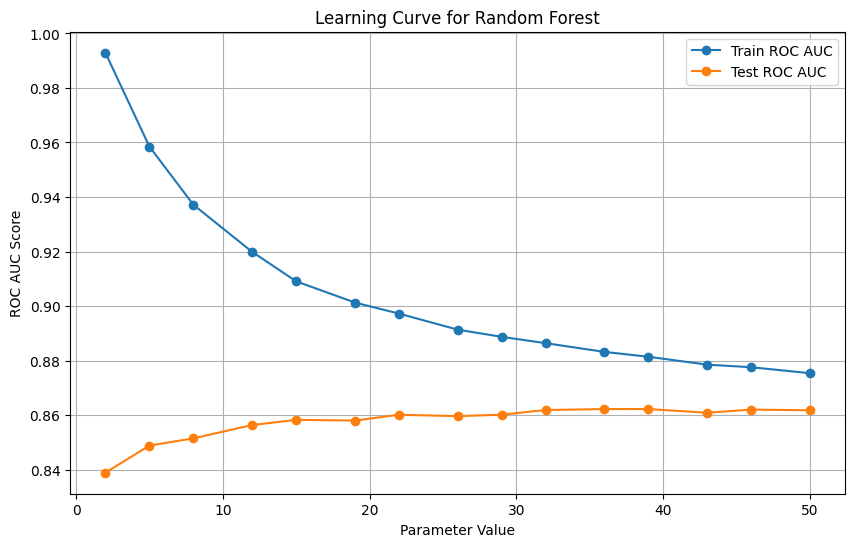

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Definisikan parameter yang ingin diuji
param_values = [int(x) for x in np.linspace(2, 50, 15)]  # Parameter yang akan diuji

train_scores = []
test_scores = []

for param in param_values:
    # Buat model dengan parameter yang diuji
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,  # Tidak dibatasi
        min_samples_split=2,  # Default
        min_samples_leaf=param,  # Parameter yang diuji
        random_state=42
    )
    model.fit(X_train, y_train)

    # Evaluasi pada train set
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
    train_scores.append(train_auc)

    # Evaluasi pada test set
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    test_scores.append(test_auc)

    # Output hasil per iterasi
    print(f'Parameter value: {param}, Train AUC: {train_auc:.3f}, Test AUC: {test_auc:.3f}')

# Plot hasil learning curve
plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Train ROC AUC', marker='o')
plt.plot(param_values, test_scores, label='Test ROC AUC', marker='o')
plt.xlabel('Parameter Value')
plt.ylabel('ROC AUC Score')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.grid()
plt.show()

*   Train AUC - Skor AUC pada data latih mencapai hampir 1.00 saat min_samples_leaf rendah, tetapi menurun seiring bertambahnya nilai parameter.
*   Test AUC - Skor AUC Stagnan pada data uji relatif stabil sekitar pada 0.86 seiring dengan perubahan parameter.

* Pada parameter 15, AUC untuk data train adalah 0.909 dan untuk data test adalah 0.858. Ini menunjukkan bahwa model masih mampu mempelajari pola dalam data train tanpa overfitting yang signifikan.
* Pada parameter 22, AUC untuk data train adalah 0.897 dan untuk data test adalah 0.860. Ini menunjukkan bahwa model tetap stabil dan mampu generalisasi dengan baik.

**Menunjukan nilai optimal pada min_samples_leaf ke 15**

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Model final dengan parameter optimal
final_model = RandomForestClassifier(
    n_estimators=50,  # Bisa menggunakan nilai terbaik dari eksplorasi lain
    max_depth=None,  # Jika diperlukan, bisa eksplorasi max_depth namun kami tidak menggunakan
    min_samples_split=2,  # Tetap default
    min_samples_leaf=15,  # Nilai optimal dari learning curve
    random_state=42
)

# Fit model dengan data
final_model.fit(X_train, y_train)

# Evaluasi pada train set
y_pred_train_proba = final_model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_pred_train_proba)

# Evaluasi pada test set
y_pred_test_proba = final_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_test_proba)

# Laporan hasil
print(f"Train ROC AUC: {train_auc:.3f}")
print(f"Test ROC AUC: {test_auc:.3f}")
print(classification_report(y_test, final_model.predict(X_test)))
eval_classification(final_model)

Train ROC AUC: 0.908
Test ROC AUC: 0.858
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      1036
         1.0       0.54      0.79      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

Accuracy (Train Set): 0.82
Accuracy (Test Set): 0.77
Precision (Test Set): 0.54
Recall (Test Set): 0.79
F1-Score (Test Set): 0.64
ROC AUC (Train Set): 0.91
ROC AUC (Test Set): 0.86
Recall (Crossval Train): 0.54
Recall (Crossval Test): 0.49


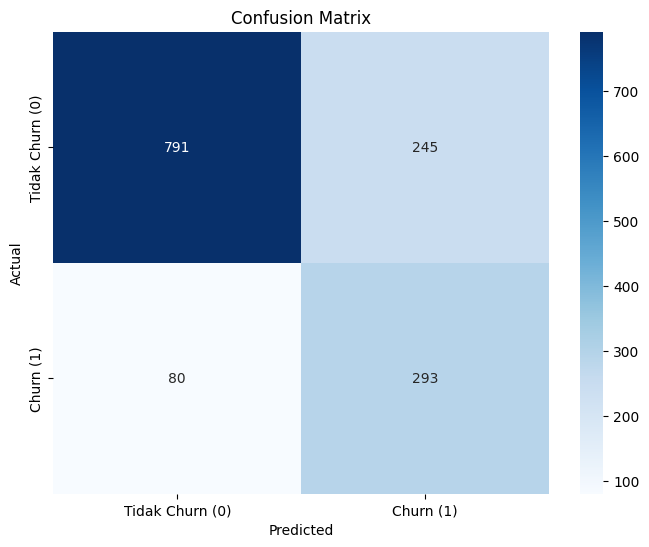

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung prediksi pada data uji
y_pred = final_model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Churn (0)', 'Churn (1)'],
            yticklabels=['Tidak Churn (0)', 'Churn (1)'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

* True Positives (TP): 293 Jumlah pelanggan yang benar-benar churn dan diprediksi churn oleh model. Ini adalah prediksi yang benar dan menunjukkan efektivitas model dalam menangkap pelanggan berisiko churn.
* True Negatives (TN): 791 Jumlah pelanggan yang tidak churn dan diprediksi sebagai tidak churn. Ini menunjukkan bahwa model dengan baik dalam mengidentifikasi pelanggan yang tetap berlangganan.
* False Positives (FP): 245 Jumlah pelanggan yang sebenarnya tidak churn tetapi diprediksi sebagai churn. Model mengalami kesalahan di sini, dan ini dapat mengarah pada upaya retention yang tidak perlu.
* False Negatives (FN): 80 Jumlah pelanggan yang sebenarnya churn tetapi diprediksi sebagai tidak churn. Ini adalah kesalahan penting karena pelanggan yang sebenarnya berisiko meninggalkan layanan tidak terdeteksi, yang dapat mengakibatkan hilangnya pendapatan.

* Peningkatan Kinerja: Model final menunjukkan peningkatan dalam ROC AUC dan recall untuk churn, yang menunjukkan bahwa model lebih baik dalam mendeteksi pelanggan yang berisiko churn.
* Stabilitas Model: Secara keseluruhan, model menunjukkan stabilitas yang baik dalam akurasi dan kemampuan generalisasi, meskipun ada ruang untuk perbaikan, terutama dalam meningkatkan precision untuk kelas churn.

**Tingkatkan Recall Kelas Churn melalui pengaturan threshold**


###**Feature Importance**

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

def show_feature_importance(model, feature_names):
    # Dapatkan importance dari fitur
    importance = model.feature_importances_

    # Buat DataFrame untuk menampilkan hasil dengan lebih rapi
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })

    # Urutkan fitur berdasarkan tingkat kepentingannya
    # Visualisasikan dalam bentuk bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df.sort_values(by='Importance', ascending=False)['Feature'], feature_importance_df.sort_values(by='Importance', ascending=False)['Importance'], color='skyblue')
    plt.gca().invert_yaxis()  # Membalik urutan agar fitur terpenting ada di atas
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance from Random Forest')
    plt.show()

    return feature_importance_df.sort_values(by='Importance', ascending=False)

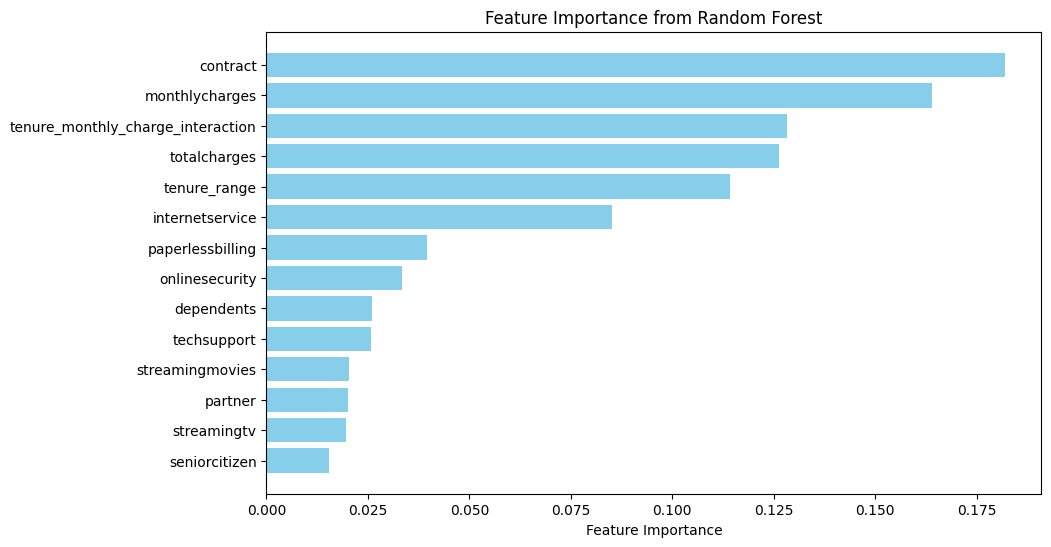

In [217]:
# Asumsikan dalam estimator terbaik dari RandomizedSearchCV
best_rf_model = rs.best_estimator_

# Daftar nama fitur (jika tidak diketahui, gunakan X.columns untuk mengambil nama dari data training)
feature_names = X_train.columns

feature_importance_df = show_feature_importance(best_rf_model, feature_names)

### **Pengaturan Threshold**

`Pengaturan threshold` merupakan tools penting dalam pengembangan model klasifikasi, termasuk Random Forest. Dengan menyesuaikan threshold, kinerja model dapat dioptimalkan sesuai dengan tujuan bisnis dan karakteristik dataset yang digunakan. Dalam konteks analisis churn, pengaturan threshold berperan dalam menemukan keseimbangan yang tepat antara menangkap pelanggan yang churn dan mengurangi kesalahan prediksi.

In [218]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report
import numpy as np

# Mendapatkan probabilitas prediksi
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.1)

# Menampilkan hasil untuk setiap threshold
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Evaluasi model pada threshold tersebut
    print(f"Threshold: {threshold:.2f}")
    print(classification_report(y_test, y_pred_adjusted))

    # Hitung ROC AUC untuk test set
    test_auc = roc_auc_score(y_test, y_pred_proba)
    # Hitung ROC AUC untuk train set
    y_train_proba = final_model.predict_proba(X_train)[:, 1]
    train_auc = roc_auc_score(y_train, y_train_proba)

    print(f"Train ROC AUC: {train_auc:.3f}")
    print(f"Test ROC AUC: {test_auc:.3f}\n")

Threshold: 0.10
              precision    recall  f1-score   support

         0.0       0.98      0.31      0.47      1036
         1.0       0.34      0.99      0.51       373

    accuracy                           0.49      1409
   macro avg       0.66      0.65      0.49      1409
weighted avg       0.81      0.49      0.48      1409

Train ROC AUC: 0.908
Test ROC AUC: 0.858

Threshold: 0.20
              precision    recall  f1-score   support

         0.0       0.97      0.45      0.62      1036
         1.0       0.39      0.96      0.55       373

    accuracy                           0.59      1409
   macro avg       0.68      0.71      0.58      1409
weighted avg       0.81      0.59      0.60      1409

Train ROC AUC: 0.908
Test ROC AUC: 0.858

Threshold: 0.30
              precision    recall  f1-score   support

         0.0       0.95      0.57      0.71      1036
         1.0       0.43      0.92      0.59       373

    accuracy                           0.66      1

In [219]:
# Data untuk tabel yang diambil dari tabel treshold
data = {
    "Threshold": [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80],
    "Precision (0)": [0.98, 0.97, 0.95, 0.94, 0.91, 0.88, 0.84, 0.79],
    "Recall (0)": [0.31, 0.45, 0.57, 0.67, 0.76, 0.85, 0.91, 0.97],
    "F1-Score (0)": [0.47, 0.62, 0.71, 0.78, 0.83, 0.86, 0.88, 0.87],
    "Precision (1)": [0.34, 0.39, 0.43, 0.49, 0.54, 0.62, 0.69, 0.76],
    "Recall (1)": [0.99, 0.96, 0.92, 0.88, 0.79, 0.68, 0.53, 0.30],
    "F1-Score (1)": [0.51, 0.55, 0.59, 0.63, 0.64, 0.65, 0.60, 0.43],
    "Accuracy": [0.49, 0.59, 0.66, 0.73, 0.77, 0.80, 0.81, 0.79],
    "Train ROC AUC": [0.908] * 8,
    "Test ROC AUC": [0.858] * 8
}

# Membuat DataFrame
results_df = pd.DataFrame(data)

# Menampilkan tabel hasil
results_df


,Threshold,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1),Accuracy,Train ROC AUC,Test ROC AUC
0,0.100000,0.980000,0.310000,0.470000,0.340000,0.990000,0.510000,0.490000,0.908000,0.858000
1,0.200000,0.970000,0.450000,0.620000,0.390000,0.960000,0.550000,0.590000,0.908000,0.858000
2,0.300000,0.950000,0.570000,0.710000,0.430000,0.920000,0.590000,0.660000,0.908000,0.858000
3,0.400000,0.940000,0.670000,0.780000,0.490000,0.880000,0.630000,0.730000,0.908000,0.858000
4,0.500000,0.910000,0.760000,0.830000,0.540000,0.790000,0.640000,0.770000,0.908000,0.858000
5,0.600000,0.880000,0.850000,0.860000,0.620000,0.680000,0.650000,0.800000,0.908000,0.858000
6,0.700000,0.840000,0.910000,0.880000,0.690000,0.530000,0.600000,0.810000,0.908000,0.858000
7,0.800000,0.790000,0.970000,0.870000,0.760000,0.300000,0.430000,0.790000,0.908000,0.858000


## **Kesimpulan**
* `Threshold 0.60` tampaknya menjadi pilihan terbaik karena memberikan keseimbangan yang baik antara precision dan recall untuk kedua kategori, dengan akurasi yang tinggi (0.80) dan F1-Score yang baik (0.86 untuk pelanggan yang tidak churn dan 0.65 untuk pelanggan yang churn). Nilai ROC AUC juga menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kategori.

* `Threshold 0.50` juga merupakan pilihan yang baik, tetapi tidak seimbang dalam hal recall untuk kategori pelanggan yang churn.

* `Threshold 0.40` memberikan recall yang sangat baik untuk kategori pelanggan yang churn, tetapi precision untuk kategori pelanggan yang tidak churn lebih rendah.

## **Rekomendasi**
`Menggunakan Threshold 0.60` untuk aplikasi di mana keseimbangan antara deteksi churn dan akurasi penting. Jika deteksi churn sangat kritis, Anda mungkin ingin mempertimbangkan threshold yang lebih rendah (seperti 0.40) untuk meningkatkan recall, meskipun dengan trade-off pada precision.

* Tidak Churn (Pelanggan yang Tetap):
Precision: 0.88
Recall: 0.85
F1-Score: 0.86

* Churn (Pelanggan yang Berhenti):
Precision: 0.62
Recall: 0.68
F1-Score: 0.65
Support: 373
Akurasi Model: 0.80

* Rata-rata Makro:
Precision: 0.75
Recall: 0.76
F1-Score: 0.75

* Rata-rata Tertimbang:
Precision: 0.81
Recall: 0.80
F1-Score: 0.81

* ROC AUC
Train ROC AUC: 0.908
Test ROC AUC: 0.858

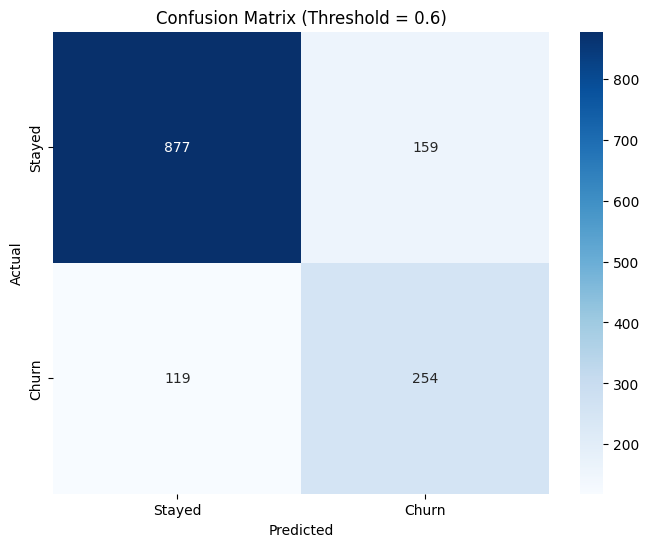

In [220]:
# Menghitung prediksi pada data uji dengan threshold 0.6
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= 0.6).astype(int)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Churn'],
            yticklabels=['Stayed', 'Churn'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Threshold = 0.6)')
plt.show()

* True Negatives (TN): 877 Jumlah pelanggan yang benar-benar tetap dan diprediksi tetap oleh model. Ini menunjukkan efektivitas model dalam mengidentifikasi pelanggan yang tidak berisiko churn.

* False Positives (FP): 159 Jumlah pelanggan yang sebenarnya tetap tetapi diprediksi churn oleh model. Ini menunjukkan adanya kesalahan dalam prediksi, di mana pelanggan yang tidak berisiko churn teridentifikasi sebagai churn.

* False Negatives (FN): 119 Jumlah pelanggan yang sebenarnya churn tetapi diprediksi tetap oleh model. Ini menunjukkan bahwa model gagal menangkap pelanggan yang berisiko churn, yang dapat berdampak negatif pada strategi retensi.

* True Positives (TP): 254 Jumlah pelanggan yang benar-benar churn dan diprediksi churn oleh model. Ini adalah prediksi yang benar dan menunjukkan efektivitas model dalam menangkap pelanggan berisiko churn.

# **📌Evaluasi Model Terbaik dan Rekomendasi Bisnis**

In [221]:
import pandas as pd

# Data untuk tabel
data = {
    "Metric": [
        "Train ROC AUC",
        "Test ROC AUC",
        "Accuracy",
        "Precision (Churn)",
        "Recall (Churn)",
        "F1-Score (Churn)",
        "True Positives (TP)",
        "True Negatives (TN)",
        "False Positives (FP)",
        "False Negatives (FN)"
    ],
    "Decision Tree (Setelah Tuning)": [
        0.80,  # Train ROC AUC
        0.81,  # Test ROC AUC
        0.72,  # Accuracy
        0.49,  # Precision (Churn)
        0.86,  # Recall (Churn)
        0.62,  # F1-Score (Churn)
        319,   # True Positives (TP)
        701,   # True Negatives (TN)
        335,   # False Positives (FP)
        54    # False Negatives (FN)
    ],
    "XGBoost (Setelah Tuning)": [
        0.94,  # Train ROC AUC
        0.85,  # Test ROC AUC
        0.78,  # Accuracy
        0.57,  # Precision (Churn)
        0.72,  # Recall (Churn)
        0.64,  # F1-Score (Churn)
        269,   # True Positives (TP)
        832,   # True Negatives (TN)
        204,   # False Positives (FP)
        104    # False Negatives (FN)
    ],
    "Random Forest (Setelah Tuning & pengaturan threshold)": [
        0.91,  # Train ROC AUC
        0.86,  # Test ROC AUC
        0.80,  # Accuracy
        0.62,  # Precision (Churn)
        0.85,  # Recall (Churn)
        0.86,  # F1-Score (Churn)
        254,   # True Positives (TP)
        877,   # True Negatives (TN)
        159,   # False Positives (FP)
        119     # False Negatives (FN)
    ]
}

# Membuat DataFrame
comparison_table = pd.DataFrame(data)

# Menampilkan tabel
comparison_table


,Metric,Decision Tree (Setelah Tuning),XGBoost (Setelah Tuning),Random Forest (Setelah Tuning & pengaturan threshold)
0,Train ROC AUC,0.800000,0.940000,0.910000
1,Test ROC AUC,0.810000,0.850000,0.860000
2,Accuracy,0.720000,0.780000,0.800000
3,Precision (Churn),0.490000,0.570000,0.620000
4,Recall (Churn),0.860000,0.720000,0.850000
5,F1-Score (Churn),0.620000,0.640000,0.860000
6,True Positives (TP),319.000000,269.000000,254.000000
7,True Negatives (TN),701.000000,832.000000,877.000000
8,False Positives (FP),335.000000,204.000000,159.000000
9,False Negatives (FN),54.000000,104.000000,119.000000


           Model  Recall (Churn)  ROC AUC (Test)
0  Decision Tree        0.860000        0.810000
1        XGBoost        0.720000        0.850000
2  Random Forest        0.850000        0.860000


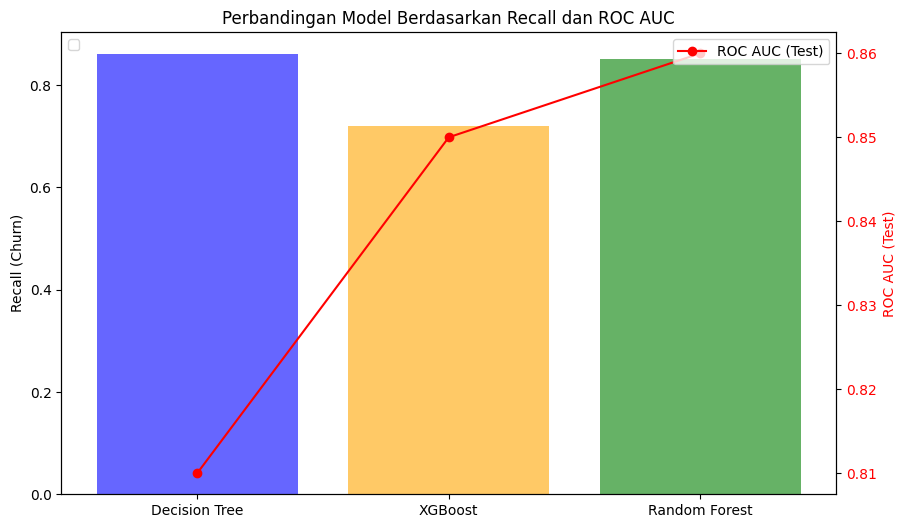

In [222]:
import matplotlib.pyplot as plt

# Data untuk tabel
data = {
    "Model": [
        "Decision Tree",
        "XGBoost",
        "Random Forest"
    ],
    "Recall (Churn)": [
        0.860,  # Recall Decision Tree
        0.720,  # Recall XGBoost
        0.850   # Recall Random Forest
    ],
    "ROC AUC (Test)": [
        0.810,  # ROC AUC Decision Tree
        0.850,  # ROC AUC XGBoost
        0.860   # ROC AUC Random Forest
    ]
}

# Membuat DataFrame
comparison_df = pd.DataFrame(data)

# Menampilkan tabel
print(comparison_df)

# Visualisasi
fig, ax1 = plt.subplots(figsize=(10, 6))

# Warna untuk setiap model
colors = ['blue', 'orange', 'green']

# Plot Recall
ax1.bar(comparison_df['Model'], comparison_df['Recall (Churn)'], color=colors, alpha=0.6)
ax1.set_ylabel('Recall (Churn)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Membuat sumbu kedua untuk ROC AUC
ax2 = ax1.twinx()
ax2.plot(comparison_df['Model'], comparison_df['ROC AUC (Test)'], color='red', marker='o', label='ROC AUC (Test)')
ax2.set_ylabel('ROC AUC (Test)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Menambahkan judul dan legenda
plt.title('Perbandingan Model Berdasarkan Recall dan ROC AUC')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Menampilkan plot
plt.show()


## **Analisis**
* **Recall**:

`Decision Tree` memiliki nilai recall tertinggi (0.860), yang berarti model ini paling efektif dalam menangkap pelanggan yang churn.
`Random Forest` juga memiliki recall yang baik (0.850), sedangkan XGBoost memiliki recall terendah (0.720).

* **ROC AUC**:

`XGBoost` memiliki nilai Train ROC AUC tertinggi (0.940), menunjukkan kemampuan terbaik dalam membedakan antara kelas pada data latih.

`Random Forest` memiliki nilai Test ROC AUC tertinggi (0.860), menunjukkan kinerja yang baik pada data uji.


## **Model Akhir**

Berdasarkan analisis di atas, berikut adalah rekomendasi model berdasarkan kebutuhan bisnis:

* XGBoost: Meskipun memiliki nilai recall yang lebih rendah, XGBoost menunjukkan kemampuan terbaik dalam membedakan antara kelas pada data latih (Train ROC AUC tertinggi). Namun, nilai recall yang lebih rendah dapat menjadi masalah jika tujuan utama adalah menangkap semua pelanggan yang churn.

* Random Forest: Memiliki keseimbangan yang baik antara ROC AUC dan recall. Dengan Test ROC AUC yang tinggi (0.860) dan recall yang baik (0.850), Random Forest adalah pilihan yang solid untuk aplikasi yang memerlukan deteksi churn yang efektif.

* Decision Tree: Meskipun memiliki recall tertinggi (0.860), nilai ROC AUC yang lebih rendah menunjukkan bahwa model ini mungkin tidak sekuat yang lain dalam membedakan antara kelas.



## **Kesimpulan**
**Rekomendasi Model Terbaik**: `Random Forest`

 Model ini menawarkan kombinasi yang baik antara kemampuan membedakan kelas (ROC AUC) dan efektivitas dalam menangkap pelanggan yang churn (recall).

# **📌Rekomendasi Bisnis**


###**Feature Importance**

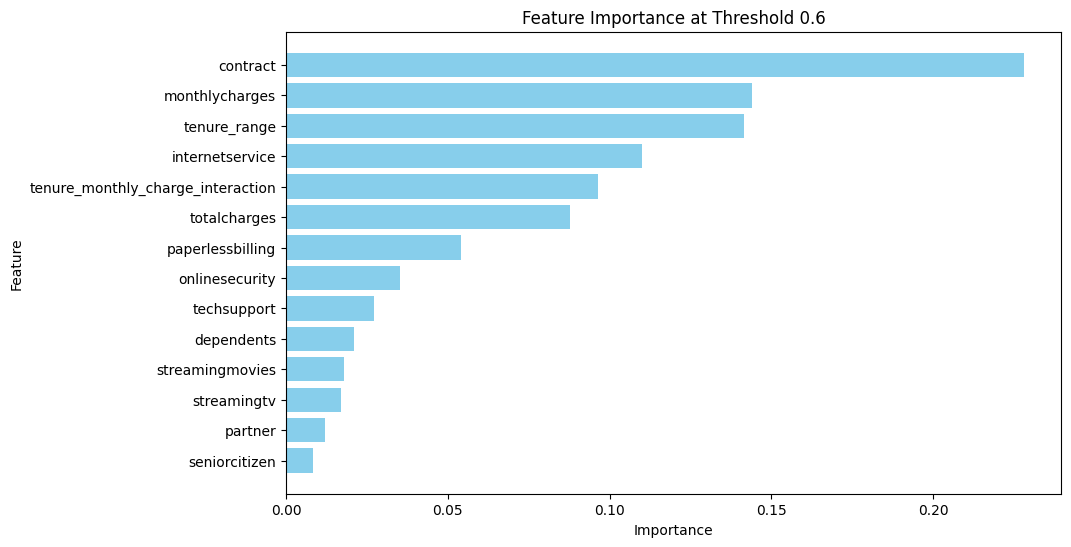

In [230]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final_model' and 'X_train' are defined from the previous code

# Get feature importances for the threshold 0.6
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
threshold = 0.6
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Assuming 'X_train' is your training data and 'feature_names' store column name
feature_names = X_train.columns
importances = final_model.feature_importances_

# Create a DataFrame with feature names and importances
df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
df = df.sort_values('Importance', ascending=False)


# Create a bar plot using Matplotlib (or any visualization library you prefer)
plt.figure(figsize=(10, 6))
plt.barh(df['Feature'], df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance at Threshold 0.6")
plt.gca().invert_yaxis()
plt.show()

## **Kesimpulan**

Rekomendasi Bisnis Berdasarkan Evaluasi Model Akhir dan Feature Importance Model Random Forest :

1. **Fokus pada Kontrak**

Feature Penting: `contract`
* Rekomendasi: Tawarkan opsi kontrak yang lebih fleksibel atau insentif untuk pelanggan yang memilih kontrak jangka panjang. Hal ini dapat membantu mengurangi churn dengan memberikan rasa komitmen kepada pelanggan.
* Opsi Campaign : `**Kontrak Fleksibel**`: Tawarkan diskon untuk pelanggan yang memilih kontrak jangka panjang. Berikan opsi untuk keluar tanpa penalti setelah periode tertentu.



2. **Optimalisasi Biaya Bulanan**

Feature Penting: `monthlycharges`

* Rekomendasi: Tinjau struktur biaya bulanan dan pertimbangkan untuk menawarkan paket yang lebih kompetitif atau diskon untuk pelanggan yang berisiko churn. Penyesuaian harga dapat meningkatkan kepuasan pelanggan dan mengurangi churn.
* Opsi Campaign : `Paket Hemat`: Luncurkan paket baru dengan harga lebih kompetitif dan manfaat tambahan. Tawarkan promo untuk pelanggan yang berisiko churn.


3. **Manfaatkan Tenure dan Total Charges**

Feature `Penting: tenure_range dan totalcharges`

* Rekomendasi: Identifikasi pelanggan dengan tenure yang lebih pendek dan total charges yang tinggi. Tawarkan program loyalitas atau penghargaan untuk meningkatkan retensi pelanggan yang telah berinvestasi lebih banyak dalam layanan.
* Opsi Campaign : `Loyalty Rewards`: Program penghargaan untuk pelanggan yang telah berlangganan lebih dari satu tahun. Berikan diskon atau bonus layanan untuk meningkatkan loyalitas.



4. **Tingkatkan Layanan Internet**

Feature Penting: `internetservice`

* Rekomendasi: Pastikan kualitas layanan internet yang ditawarkan memenuhi harapan pelanggan. Pertimbangkan untuk meningkatkan kecepatan atau menawarkan paket tambahan yang menarik untuk pelanggan yang menggunakan layanan internet.
* Opsi Campaign : `Upgrade Gratis`: Tawarkan upgrade kecepatan internet gratis selama satu bulan untuk pelanggan yang berisiko churn.

5. **Interaksi antara Tenure dan Biaya Bulanan**

Feature Penting: `tenure_monthly_charge_interaction`

* Rekomendasi: Analisis interaksi antara lama berlangganan dan biaya bulanan untuk mengidentifikasi pola churn. Tawarkan penyesuaian harga atau promosi khusus untuk pelanggan yang telah lama berlangganan tetapi merasa biaya bulanan terlalu tinggi.
* Opsi Campaign `Penyesuaian Harga`: Tawarkan penyesuaian harga untuk pelanggan yang telah lama berlangganan tetapi merasa biaya terlalu tinggi.

6. **Tingkatkan Layanan Pelanggan**

Feature Penting: `techsupport, onlinesecurity, dan paperlessbilling`

* Rekomendasi: Tingkatkan layanan pelanggan dengan menyediakan dukungan teknis yang lebih baik dan opsi keamanan online. Edukasi pelanggan tentang manfaat dari layanan ini untuk meningkatkan kepuasan dan loyalitas.
* Opsi Campaign `Support Anytime`: Luncurkan layanan dukungan 24/7 dengan pelatihan khusus untuk tim layanan pelanggan. Tawarkan sesi edukasi online tentang penggunaan layanan.

7. **Segmentasi Pelanggan**

Feature Penting: `dependents, streamingmovies, streamingtv, partner, dan seniorcitizen`

* Rekomendasi: Lakukan segmentasi pelanggan berdasarkan fitur-fitur ini untuk menyesuaikan penawaran dan komunikasi. Misalnya, tawarkan paket khusus untuk keluarga, pelanggan senior, atau pengguna layanan streaming.
* Opsi Campaign `Paket Keluarga`: Tawarkan paket khusus untuk keluarga dengan layanan streaming dan dukungan tambahan. `Senior Special`: Program khusus untuk pelanggan senior dengan diskon dan layanan yang disesuaikan.

# **🎉Hasil Akhir🎉**

`1. Fitur mana yang sebaiknya digunakan dari hasil EDA?`

Berdasarkan heatmap korelasi di atas, ada beberapa fitur yang korelasi nya signifikan dengan target fitur churn (sesuai dengan nilai treshold yang ditetapkan sebesar 0.15).

Fitur-fitur ini sebagai berikut :

* contract
* tenure_range
* internetservice
* totalcharges
* tenure_monthly_charge_interaction
* monthlycharges
* paperlessbilling
* onlinesecurity
* techsupport
* dependents

Fitur yang Bisa Dipertimbangkan
* seniorcitizen & partner - meskipun korelasi positif kecil, karena pelanggan senior dan memiliki pasangan/partner sedikit lebih berisiko churn.
* streamingtv dan streamingmovies - meskipun korelasi sangat kecil dipertimbangkan karna dampak layanan hiburan terhadap churn.

fitur yang tidak digunakan
* paymentmethod
* onlinebackup
* deviceprotection
* multiplelines
* phoneservice
* gender
* tenure (karena sudah digantikan oleh tenure_range menghindari multikolinearitas)

`2. Apakah ada feature tambahan lain yang mendukung?`

1. Menambahkan fitur baru Lama Berlangganan dalam Rentang (tenure_range)
2. Menambahkan Fitur Interaksi antara monthlycharges dan tenure (tenure_monthly_charge_interaction)

**Terbukti dengan hasil akhir kedua fitur ini sangat mendukung model**

3. `Melakukan training model & prediksi churn sebagai variabel target`

berikut adalah training model untuk prediksi churn sebagai bariabel target berdasarkan kebutuhan bisnis:

* XGBoost: Meskipun memiliki nilai recall yang lebih rendah, XGBoost menunjukkan kemampuan terbaik dalam membedakan antara kelas pada data latih (Train ROC AUC tertinggi). Namun, nilai recall yang lebih rendah dapat menjadi masalah jika tujuan utama adalah menangkap semua pelanggan yang churn.

* Random Forest: Memiliki keseimbangan yang baik antara ROC AUC dan recall. Dengan Test ROC AUC yang tinggi (0.860) dan recall yang baik (0.850), Random Forest adalah pilihan yang solid untuk aplikasi yang memerlukan deteksi churn yang efektif.

* Decision Tree: Meskipun memiliki recall tertinggi (0.860), nilai ROC AUC yang lebih rendah menunjukkan bahwa model ini mungkin tidak sekuat yang lain dalam membedakan antara kelas.


`4. Mengevaluasi model dengan metrics Recall dan ROC-AUC.`

Berikut ini adalah evaluasi model dengan metrics Recall dan ROC-AUC

* **Recall**:

`Decision Tree` memiliki nilai recall tertinggi (0.860), yang berarti model ini paling efektif dalam menangkap pelanggan yang churn.
`Random Forest` juga memiliki recall yang baik (0.850), sedangkan XGBoost memiliki recall terendah (0.720).

* **ROC AUC**:

`XGBoost` memiliki nilai Train ROC AUC tertinggi (0.940), menunjukkan kemampuan terbaik dalam membedakan antara kelas pada data latih.

`Random Forest` memiliki nilai Test ROC AUC tertinggi (0.860), menunjukkan kinerja yang baik pada data uji.